In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Load Dataset

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Preprocessing

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

#Reshape

In [16]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

### Convert labels using one hot encoding

In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Build the CNN Model

In [19]:
model = models.Sequential()

#First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

#Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten the 3D output to 1D and add a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#Output Layer
model.add(layers.Dense(10, activation='softmax'))

###Compile, train and evaluate the model

In [20]:
#Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

#Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.8311 - loss: 0.5523 - val_accuracy: 0.9701 - val_loss: 0.0988
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9720 - loss: 0.0928 - val_accuracy: 0.9800 - val_loss: 0.0677
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9803 - loss: 0.0652 - val_accuracy: 0.9852 - val_loss: 0.0500
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9858 - loss: 0.0449 - val_accuracy: 0.9839 - val_loss: 0.0530
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9831 - val_loss: 0.0547
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9859 - val_loss: 0.0534
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9866 - val_loss: 0.0494
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9934 - loss: 0.0217 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Prediction for hundredth test image:9


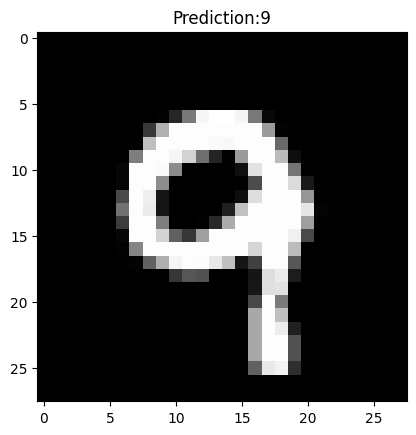

In [26]:
#Make Predictions
predict = model.predict(X_test)
print(f"Prediction for hundredth test image:{np.argmax(predict[99])}")

import matplotlib.pyplot as plt
plt.imshow(X_test[99].reshape(28, 28), cmap='gray')
plt.title(f"Prediction:{np.argmax(predict[99])}")
plt.show()